# MOwNiT
## Laboratorium 7
### Transformata Fouriera

Korzystamy z pakietu FFTW
```julia
Pkg.add("FFTW")
```
Jest to Juliowy wrapper do biblioteki FFTW http://www.fftw.org/fftw3_doc/

### Przykład

In [1]:
# produkcja sztucznego sygnału.
#Wybieram częstotliwość próbkowania
Fs = 1024;  

# generuje wektor punktów czasowych w przedziale [0 1] co 1/Fs
t = 0:1/(Fs-1):1; 

#Obliczam wartość sygnału (tutaj sinus o częstotliwości 200 Hz) 
x= sin.(2*pi*t*200)


1024-element Array{Float64,1}:
  0.0
  0.9419475186694806
  0.6325368627715737
 -0.5171861866049747
 -0.9798378763206036
 -0.14079481979764608
  0.885291299314819
  0.7352858822068841
 -0.3915319168087448
 -0.9982075051471587
 -0.27878466791212514
  0.8109979465095004
  0.8233862371417046
  ⋮
 -0.8109979465094938
  0.27878466791213613
  0.9982075051471594
  0.3915319168087342
 -0.7352858822068918
 -0.8852912993148141
  0.1407948197976556
  0.9798378763206055
  0.5171861866049668
 -0.6325368627715805
 -0.9419475186694778
  7.857546894913888e-15

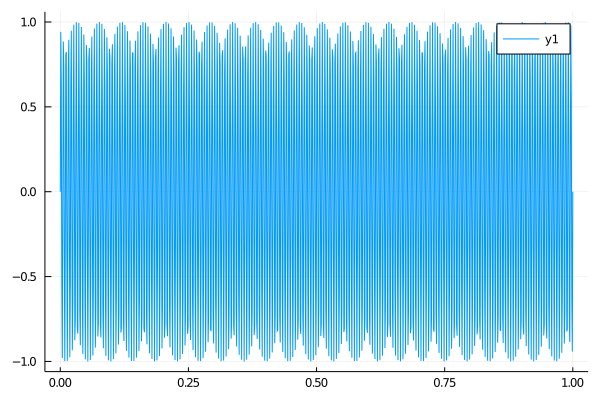

In [2]:
using Plots
plot(t,x)

In [5]:
using Pkg
Pkg.add("FFTW")
using FFTW
#Dokonuję transformaty Fouriera
y=fft(x)


   Updating registry at `C:\Users\kzaja\.julia\registries\General`
  Resolving package versions...
  Installed FFTW_jll ──────── v3.3.9+7
  Installed MKL_jll ───────── v2021.1.1+1
  Installed IntelOpenMP_jll ─ v2018.0.3+2
  Installed LazyArtifacts ─── v1.3.0
  Installed AbstractFFTs ──── v1.0.0
  Installed FFTW ──────────── v1.3.2
Updating `C:\Users\kzaja\.julia\environments\v1.5\Project.toml`
  [7a1cc6ca] + FFTW v1.3.2
Updating `C:\Users\kzaja\.julia\environments\v1.5\Manifest.toml`
  [621f4979] + AbstractFFTs v1.0.0
  [7a1cc6ca] + FFTW v1.3.2
  [f5851436] + FFTW_jll v3.3.9+7
  [1d5cc7b8] + IntelOpenMP_jll v2018.0.3+2
  [4af54fe1] + LazyArtifacts v1.3.0
  [856f044c] + MKL_jll v2021.1.1+1
   Building FFTW → `C:\Users\kzaja\.julia\packages\FFTW\G3lSO\deps\build.log`
┌ Info: Precompiling FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1278


1024-element Array{Complex{Float64},1}:
  5.218048215738236e-14 + 0.0im
  1.3347887720671636e-5 - 0.0043507213858283295im
   5.339558898209695e-5 - 0.008702018832949424im
 0.00012015521804265017 - 0.013054468689263438im
 0.00021364697629788765 - 0.01740864787475374im
  0.0003338991669802338 - 0.021765134171590844im
  0.0004809482163419254 - 0.026124506508033274im
  0.0006548387016591661 - 0.03048734525091712im
  0.0008556233822289983 - 0.034854232495481696im
  0.0010833632430690132 - 0.03922575235784542im
  0.0013381275373085533 - 0.04360249127059146im
  0.0016199938400546232 - 0.04798503827830425im
  0.0019290481075099342 - 0.05237398534063109im
                        ⋮
  0.0019290481075107113 + 0.05237398534063198im
   0.001619993840058065 + 0.047985038278303804im
  0.0013381275373096635 + 0.04360249127059346im
  0.0010833632430706785 + 0.039225752357840094im
  0.0008556233822289983 + 0.03485423249547637im
  0.0006548387016565016 + 0.030487345250920228im
  0.0004809482163428136 + 0.

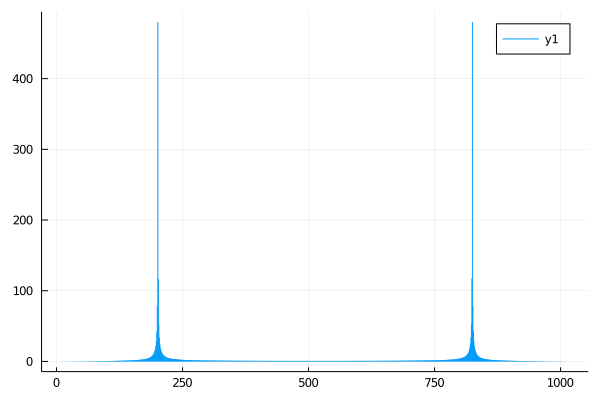

In [6]:
# wykres słupkowy transformaty (moduł z liczb zespolonych).
# symetryczny
# widoczna wysoka amplituda dla częstotliwości sygnału (tutaj 200) oraz symetrycznego odbicia tej 
# częstotliwości  
sticks((abs.(fft(x))))

In [7]:
? fft

search: fft fft! fftfreq FFTW fftshift rfft ifft bfft ifft! bfft! rfftfreq



```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`. The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along. Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `Base.nextprod`. See also [`plan_fft()`](@ref) for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$$
\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].
$$

A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

!!! note
    This performs a multidimensional FFT by default. FFT libraries in other languages such as Python and Octave perform a one-dimensional FFT along the first non-singleton dimension of the array. This is worth noting while performing comparisons.



Zadania:
1. Zamień sygnał na sumę sygnałów np
```julia
x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
```

  Zaobserwuj wynik transformaty i wyjaśnij go.
<p>
2.  Usuwanie szumów:

    1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
    2. Proszę narysować wykres zaszumionej funkcji.
    3. Narysować wykres transformaty Fouriera (widmo)  tego sygnału (jak poprzednio).
    4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
    5.Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla <b> częsci  rzeczywistej</b>. Porównać z wejściowym wykresem sygnału.
<p>
3. Proszę nagrać własny glos i zastosować na nim trasformatę Fouriera, narysować wykres widma. Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.
<p>
Przydatne materiały:
     1. <a href="http://samcarcagno.altervista.org/blog/basic-sound-processing-julia/"> Basic sound processing</a>
     2. <a href="https://github.com/dancasimiro/WAV.jl"> Pakiet Wav </a>